DUONG Duc Nguyen

In [320]:
import pandas as pd
cities = pd.read_csv("drive/MyDrive/Colab Notebooks/cities.csv")
stations = pd.read_csv("drive/MyDrive/Colab Notebooks/stations.csv")
providers = pd.read_csv("drive/MyDrive/Colab Notebooks/providers.csv")
ticket_data = pd.read_csv("drive/MyDrive/Colab Notebooks/ticket_data.csv")


Regardons les dataframes pour avoir une idée globale


In [321]:
ticket_data.head(5)

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542


In [322]:
stations.head()

,id,unique_name,latitude,longitude
0,1,Aalen (Stuttgarter Straße),48.835296,10.092956
1,2,Aéroport Bordeaux-Mérignac,44.830226,-0.700883
2,3,Aéroport CDG,49.009900,2.559310
3,4,Aéroport de Berlin-Schönefeld,52.389446,13.520345
4,5,Aéroport de Dresden,51.123604,13.764737


In [323]:
cities.head()

,id,local_name,unique_name,latitude,longitude,population
0,5159,"Padua, Veneto, Italia",padua,45.406435,11.876761,209678.0
1,76,"Barcelona, Cataluña, España",barcelona,41.385064,2.173404,1611822.0
2,81,"Basel, Basel-Stadt, Schweiz",basel,47.593437,7.619812,NaN
3,259,"Erlangen, Bayern, Deutschland",erlangen,49.589674,11.011961,105412.0
4,11979,"Balș, Olt, România",balș,44.353354,24.095672,NaN


In [324]:
providers.head()

,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
1,10,2,NaN,deinbus,Deinbus.de,False,False,False,False,bus
2,11,3,NaN,infobus,Infobus,False,False,False,False,bus
3,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
4,13,5,NaN,flixbus,Flixbus,True,False,False,False,bus


Voyons quelles sont les modes de transports proposées par Tictatrip


In [325]:
providers.transport_type.unique()

array(['bus', 'car', 'train', 'carpooling'], dtype=object)

Ca a l'air correspondre bien de ce que je trouve sur le site de Tictac trip :). Voyons maintenant si la dataframe contient des données manquantes

In [326]:
providers.isna().sum()

id                       0
company_id               0
provider_id             14
name                     0
fullname                 0
has_wifi                 3
has_plug                 3
has_adjustable_seats     3
has_bicycle              3
transport_type           0
dtype: int64

Les provider_id sont difficles à corriger, essayons maintenant de corriger les valeurs manquantes des variables "has_wifi", "has_plug", "has_adjustable_seats" et "has_bicycle".

In [327]:
providers[providers["transport_type"] == "bus"].has_plug.value_counts()

False    209
True       2
Name: has_plug, dtype: int64

In [328]:
providers[providers["transport_type"] == "bus"].has_wifi.value_counts()

False    208
True       3
Name: has_wifi, dtype: int64

In [329]:
providers[providers["transport_type"] == "bus"].has_adjustable_seats.value_counts()

False    207
True       4
Name: has_adjustable_seats, dtype: int64

In [330]:
providers[providers["transport_type"] == "bus"].has_bicycle.value_counts()

False    211
Name: has_bicycle, dtype: int64

Nous constatons qu'il y a une forte chance que ces variables sont à false. Remplaçons ces valeurs par false. (car on en a besoin pour la suite)

In [331]:
providers[providers["has_plug"].isna()]

,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
212,8374,20,NaN,transdev,Transdev,NaN,NaN,NaN,NaN,bus
224,8387,30,NaN,vatry,Vatry,NaN,NaN,NaN,NaN,bus
225,8388,40,NaN,beauval,Beauval,NaN,NaN,NaN,NaN,bus


In [332]:
providers[["has_plug","has_adjustable_seats","has_wifi","has_bicycle"]] = providers[["has_plug","has_adjustable_seats","has_wifi","has_bicycle"]].fillna(False)

In [333]:
providers.isna().sum()

id                       0
company_id               0
provider_id             14
name                     0
fullname                 0
has_wifi                 0
has_plug                 0
has_adjustable_seats     0
has_bicycle              0
transport_type           0
dtype: int64

Ca a l'air bien maintenant pour la dataframe providers. Regardons cities.

In [334]:
cities.isna().sum()

id                0
local_name        0
unique_name       1
latitude          0
longitude         0
population     7671
dtype: int64

Corrigeons ensuite la seule valeur manquante de "unique_name", la population humm... on va essayer de remplacer si on en a besoin, sinon tant pis! :)

In [335]:
cities[cities["unique_name"].isna()]

,id,local_name,unique_name,latitude,longitude,population
6866,10244,", Hamburg, Deutschland",NaN,39.613402,2.880431,NaN


In [336]:
cities[cities["unique_name"].isna()] = "hamburg"

stations pas de données manquantes, impécable! :>

In [337]:
stations.isna().sum()

id             0
unique_name    0
latitude       0
longitude      0
dtype: int64

Ticket_data : certaines lignes contiennent des données manquantes. En fait, après l'investigation, j'ai remarqué que ce sont les trips en covoit qui présentent des données manquantes dans les colonnes "o_station","d_station","middle_stations","other_companies" ce qui est très logique.

In [338]:
ticket_data.isna().sum()

id                     0
company                0
o_station          41441
d_station          41441
departure_ts           0
arrival_ts             0
price_in_cents         0
search_ts              0
middle_stations    41441
other_companies    41441
o_city                 0
d_city                 0
dtype: int64

In [339]:
ticket_data

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542
...,...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,13,279.0,10729.0,2017-10-27 02:30:00+00,2017-10-27 16:00:00+00,2590,2017-10-19 10:35:42.943+00,"{408,408}",{8371},628,562
74164,6869185,9,279.0,304.0,2017-10-27 07:00:00+00,2017-10-27 13:30:00+00,2700,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562
74165,6869187,8371,10642.0,304.0,2017-10-27 08:30:00+00,2017-10-27 15:15:00+00,3000,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562
74166,6869189,13,279.0,304.0,2017-10-27 13:25:00+00,2017-10-27 21:10:00+00,2880,2017-10-19 10:35:42.943+00,"{863,863}",{13},628,562


Je vais éviter de modifier les dataframes (l'histoire de ne pas perdre les informations dans le cas qu'on en a besoin après). Donc je vais travailler essentiellement sur la dataframe trips que je vais créer dans la suite.

Je vais importer les colonnes temps de départ et temps d'arriver dans la df trips et les transformer en datetime.

In [340]:
from datetime import datetime
datetime_vars = ['departure_ts','arrival_ts']
trips = pd.DataFrame()
for var in datetime_vars:
    trips[var] = ticket_data[var].apply(lambda x : x.split('+')[0])
    trips[var] = trips[var].apply(lambda x : datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

Je fais la différence des temps pour avoir la durée des trips. :) logique!

In [341]:
trips["duration"] = trips.arrival_ts - trips.departure_ts

Importer la colonne prix et convertir la durée en secondes.

In [342]:
trips["duration"] = trips["duration"].apply(lambda x : x.total_seconds())
trips["price"] = ticket_data["price_in_cents"]
trips = trips.drop(columns = ["departure_ts","arrival_ts"])

Voilà à quoi la df ressemble maintenant.

In [343]:
trips.head()

,duration,price
0,22200.0,4550
1,64200.0,1450
2,115020.0,7400
3,77700.0,13500
4,78360.0,7710


La réponse à la première question donnée :

In [344]:
index = {"price":"cents","duration":"s"}
for var in index:
    print("%s moyen : %d %s"%(var,trips[var].mean(),index[var]))
    print("%s max : %d %s"%(var,trips[var].max(),index[var]))
    print("%s min : %d %s"%(var,trips[var].min(),index[var]))

price moyen : 4382 cents
price max : 38550 cents
price min : 300 cents
duration moyen : 25477 s
duration max : 1774260 s
duration min : 1200 s


In [345]:
1774360/(3600*24)

20.536574074074075

Les informations trouvées me semblent logique sauf je n'attendais pas à un trip de durée 1774260 secondes soit 20 jours.

Pour répondre à la deuxième question, je dois calculer la distance des trips. Pour cela je vais utiliser o_city et d_city vu qu'on a des données manquantes pour o_station et d_station.
Pour cela j'utilise les les latitudes et les longitudes.

Donc soit $r_T = 6371$ km le rayon de la Terre.

On calcule alors la distance entre un point A et un point B par :

$\sqrt{(long_A-long_B)^2 +(lati_A-lati_B)^2}\times a$ 

Avec $a = \frac{2\pi \times r_T}{360}$ 

In [346]:
import math
distance_df = pd.DataFrame(ticket_data[["o_city","d_city"]])
distance_df = distance_df.join(cities[["id","latitude","longitude"]].set_index('id'), on='o_city' )
distance_df = distance_df.rename(columns = {'longitude':'o_longitude', 'latitude':'o_latitude'})
distance_df = distance_df.join(cities[["id","latitude","longitude"]].set_index('id'), on='d_city' )
distance_df = distance_df.rename(columns = {'longitude':'d_longitude', 'latitude':'d_latitude'})

r_T = 6371
P_T = 2*math.pi*r_T
a = P_T/360
distance_df["distance"] = (distance_df.d_longitude-distance_df.o_longitude)**2 + (distance_df.d_latitude-distance_df.o_latitude)**2
distance_df.distance = distance_df.distance.apply(lambda x : math.sqrt(x)*a)

In [347]:
trips['distance'] = distance_df['distance']

Voilà à quoi ressemble la df trips maintenant.

In [348]:
trips.head()

,duration,price,distance
0,22200.0,4550,528.151454
1,64200.0,1450,528.151454
2,115020.0,7400,528.151454
3,77700.0,13500,528.151454
4,78360.0,7710,528.151454


In [349]:
providers.describe()

,id,company_id
count,227.000000,227.000000
mean,790.656388,9.343612
std,2251.823950,3.036065
min,9.000000,1.000000
25%,66.500000,9.000000
50%,127.000000,9.000000
75%,183.500000,9.000000
max,8389.000000,40.000000


In [350]:
ticket_data.describe()

,id,company,o_station,d_station,price_in_cents,o_city,d_city
count,7.416800e+04,74168.000000,32727.000000,32727.000000,74168.000000,74168.000000,74168.000000
mean,6.832108e+06,7109.565527,2907.132673,2347.858129,4382.711061,849.186105,883.776265
std,2.141060e+04,3005.380792,3347.629180,3090.798007,3739.325367,1485.791782,1654.698575
min,6.795025e+06,9.000000,3.000000,3.000000,300.000000,5.000000,1.000000
25%,6.813567e+06,8376.000000,400.000000,396.000000,1900.000000,485.000000,453.000000
50%,6.832108e+06,8385.000000,701.000000,575.000000,3350.000000,628.000000,562.000000
75%,6.850650e+06,8385.000000,6246.000000,4538.000000,5250.000000,628.000000,628.000000
max,6.869192e+06,8387.000000,11017.000000,11017.000000,38550.000000,12190.000000,12190.000000


In [351]:
type_df = pd.DataFrame(ticket_data.company)
type_df = type_df.join(providers[["id","transport_type"]].set_index('id'), on='company' )
trips["transport_type"] = type_df["transport_type"]

In [352]:
trips.isna().sum()

duration          0
price             0
distance          0
transport_type    0
dtype: int64

In [353]:
def distanceType(d):
    if d <= 200 : return 1
    elif d <= 800 : return 2
    elif d <= 2000 : return 3
    else : return 4
trips["distanceType"] = trips["distance"].apply(lambda x : distanceType(x))

La réponse à la question 2:

In [354]:
pd.DataFrame(trips.groupby(["distanceType","transport_type"]).mean()["price"])

price
distanceType transport_type              
1            bus              2101.735504
             carpooling       1079.055225
             train            3082.196397
2            bus              3380.018268
             carpooling       3098.176370
             train            8706.264301
3            bus              5749.939363
             carpooling       6172.822314
             train           15543.151796
4            bus              9638.942308
             carpooling      12400.000000

Maintenant essayons de construire un modèle pour estimer le prix des voyages. Pour cela, je vais faire les features engineering suivants:

In [355]:
ticket_data.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542


On va utiliser : la durée, le type de transport, le nombre de middle_stations, le nombre de companies et le nom des villes de départ et ville d'arriver comme variables explicatives.

In [356]:
trips[["company","middle_stations","other_companies","o_city","d_city"]] = ticket_data[["company","middle_stations","other_companies","o_city","d_city"]]
trips.head()

,duration,price,distance,transport_type,distanceType,company,middle_stations,other_companies,o_city,d_city
0,22200.0,4550,528.151454,carpooling,2,8385,NaN,NaN,611,542
1,64200.0,1450,528.151454,bus,2,9,"{149,418}",{13},611,542
2,115020.0,7400,528.151454,train,2,8377,"{798,798,6794,6246}","{8377,8376}",611,542
3,77700.0,13500,528.151454,train,2,8377,"{798,798,6794,6246}","{8377,8376}",611,542
4,78360.0,7710,528.151454,train,2,8381,"{5983,5983}",{8380},611,542


In [357]:
trips = trips.join(cities[["id","local_name"]].set_index('id'), on='o_city' )
trips = trips.rename(columns = {'local_name':'o_local_name'})
trips = trips.join(cities[["id","local_name"]].set_index('id'), on='d_city' )
trips = trips.rename(columns = {'local_name':'d_local_name'})

Ici, je retiens les noms des pays de départ et pays d'arrivée

In [358]:
trips = trips.drop(columns = ["o_city","d_city"])
vars = ["o_local_name","d_local_name"]
for var in vars :
    trips[var] = trips[var].apply(lambda c : c.split(',')[2])  

In [359]:
trips.o_local_name.unique()

array([' France', ' Schweiz', ' Belgique', ' Italia', ' Nederland',
       ' Deutschland', ' România', ' Danmark', ' España', ' Portugal',
       ' United Kingdom', ' UK', ' Slovenija',
       ' België - Belgique - Belgien', ' Česko', ' Polska', ' Luxembourg',
       ' Monaco'], dtype=object)

In [360]:
trips.d_local_name.unique()

array([' France', ' Belgique', ' Deutschland', ' Nederland', ' Italia',
       ' Schweiz', ' España', ' United Kingdom', ' Danmark', ' Norge',
       ' Česko', ' Portugal', ' Sverige', ' Slovenija', ' UK',
       ' България', ' Polska', ' Luxembourg', ' România', ' Hrvatska',
       ' Magyarország', ' Ireland', ' Österreich',
       ' Црна Гора / Crna Gora', ' Slovensko'], dtype=object)

Ensuite, j'ajoute les informations has_wifi, has_plug dans la df parce que cela va avoir un impact sur le prix

In [361]:
trips = trips.join(providers[["id","has_wifi","has_plug","has_adjustable_seats","has_bicycle"]].set_index('id'), on='company' )
trips = trips.drop(columns = ["company"])

In [362]:
vars = ["has_wifi","has_plug","has_adjustable_seats","has_bicycle"]
for var in vars :
    trips[var] = trips[var].apply(lambda x : 0 if x == False else 1)

Puis je compte les middle_stations et les other_companies des trips. Pour les trips en covoit, ces nombres sont à 0.

In [363]:
trips.middle_stations = trips.middle_stations.apply(lambda x : 0 if isinstance(x,float) else len(x.split(',')))
trips.other_companies = trips.other_companies.apply(lambda x : 0 if isinstance(x,float) else len(x.split(',')))

In [364]:
print(trips.middle_stations.unique())
print(trips.other_companies.unique())

[0 2 4 6]
[0 1 2 3]


In [365]:
trips = trips.drop(columns= ["distanceType"])

Ici je fais un qcut des prix pour séparer la dataset en train set et test set. (On veut un jeu de données bien équilibré)

In [366]:
pd.qcut(trips.price,q = 5).value_counts()

(299.999, 1700.0]    15109
(6026.0, 38550.0]    14834
(2790.0, 3750.0]     14834
(3750.0, 6026.0]     14824
(1700.0, 2790.0]     14567
Name: price, dtype: int64

In [367]:
def priceType(p):
    if p <= 300: return 1
    elif p <= 1700: return 2
    elif p <= 3750: return 3
    elif p <= 6026: return 4
    else : return 5 

In [368]:
trips["priceType"] = trips.price.apply(lambda p : priceType(p))

In [369]:
numerical_features = ["duration","distance"]
categorical_features = ['transport_type', 'middle_stations', 'other_companies', 'o_local_name', 'd_local_name']
print(categorical_features)
print(numerical_features)

['transport_type', 'middle_stations', 'other_companies', 'o_local_name', 'd_local_name']
['duration', 'distance']


In [370]:
from sklearn.model_selection import StratifiedShuffleSplit
# Run the split. Creates on split and shares 20% of the dataset for the test set
split = StratifiedShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 42)

# Separate the stratified train set and the test set
for train_index, test_index in split.split(trips, trips["priceType"]):
    strat_train_set = trips.iloc[train_index]
    strat_test_set = trips.iloc[test_index]

In [371]:
X_train = strat_train_set.drop(['price','priceType'],axis = 1)
Y_train = strat_train_set['price']

X_test = strat_test_set.drop(['price','priceType'],axis = 1)
Y_test = strat_test_set['price']

print('X_train shape :',X_train.shape)
print('X_test shape :',X_test.shape)
print('Y_train shape :',Y_train.shape)
print('Y_test shape :',Y_test.shape)

X_train shape : (59334, 11)
X_test shape : (14834, 11)
Y_train shape : (59334,)
Y_test shape : (14834,)


J'applique un standard scaler pour les variables quantitatives et un one hot encoder pour les variables qualitatives.

In [372]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
#Pipeline to transform our dataset
pipeline = ColumnTransformer([
    ("num", StandardScaler(), numerical_features), # Perform feaured scaling on numeric attributes
    ("cat", OneHotEncoder(), categorical_features) # Perform One-Hot encoding on the category attributes
])

In [373]:
combined = X_train.append(X_test)
combined = pipeline.fit_transform(combined)

In [374]:
X_train = combined[:59334] 
X_test = combined[59334:]

In [375]:
mae_list = []
rmse_list = []
rsquare_list = []
regressor = []

In [376]:
import matplotlib.pyplot as plt
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from prettytable import PrettyTable
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import StandardScaler
from prettytable import PrettyTable
from sklearn.neighbors import KNeighborsRegressor

import numpy as np

Ici je fais une fonction pour comparer plusieurs modèles.

In [377]:
def display_model(model_name,model,
                  X_train = X_train, Y_train = Y_train,
                  X_test = X_test, Y_test = Y_test,
                  save = True):
    

    #fit model
    model.fit(X_train,Y_train)

    #prediction
    Y_pred=model.predict(X_test)
    
    #Score
    print("====== Test Score ======")
    Rsquare=model.score(X_test,Y_test)
    print("Rsquare: %f" %(Rsquare))

    #reconvert to normal scale
    mae = metrics.mean_absolute_error(Y_test,Y_pred)
    print("mae: %f" %(mae))
    rmse=np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
    print("rmse: %f" %(rmse))

    #save
    if (save):
        regressor.append(model_name)
        rsquare_list.append(Rsquare)
        mae_list.append(mae)
        rmse_list.append(rmse)

    #plot 
    print("====== Test Prediction vs Actual ======")
    plt.scatter(Y_test, Y_pred)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    x_lim = plt.xlim()
    y_lim = plt.ylim()
    plt.plot(x_lim, y_lim, "k--")
    plt.show()
    return Y_pred

====== Test Score ======
Rsquare: 0.701744
mae: 1204.549078
rmse: 2062.402161
====== Test Prediction vs Actual ======


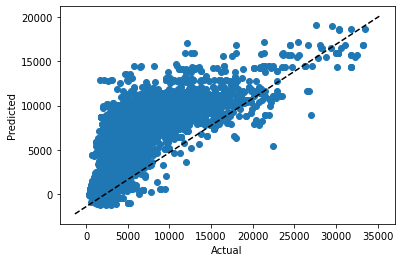

array([2052.44844466, 1847.69266536,  710.14477921, ..., 8337.74730201,
       3521.40389844, 2206.22132892])

In [378]:
reg_linear=linear_model.LinearRegression()
display_model("Regression Lineaire",reg_linear)

====== Test Score ======
Rsquare: 0.918128
mae: 468.032737
rmse: 1080.551421
====== Test Prediction vs Actual ======


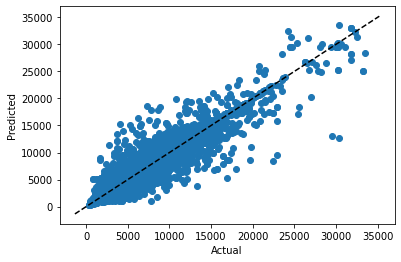

array([ 2598.66666667,  1734.42622951,   796.875     , ...,
       11020.        ,  3025.27472527,  3059.        ])

In [379]:
decision_tree = DecisionTreeRegressor(random_state = 42)
display_model("Decision tree regressor",decision_tree)

====== Test Score ======
Rsquare: 0.930559
mae: 470.652805
rmse: 995.147485
====== Test Prediction vs Actual ======


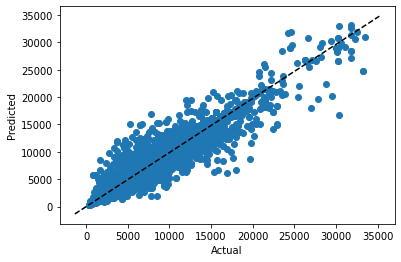

array([ 2597.31239416,  1729.37093772,   797.76629005, ...,
       10882.31333333,  3033.40600273,  2751.81414495])

In [380]:
rf = RandomForestRegressor(max_depth =  None, n_estimators = 50)
display_model("Random Forest Regression",rf)

====== Test Score ======
Rsquare: 0.931106
mae: 470.867395
rmse: 991.219298
====== Test Prediction vs Actual ======


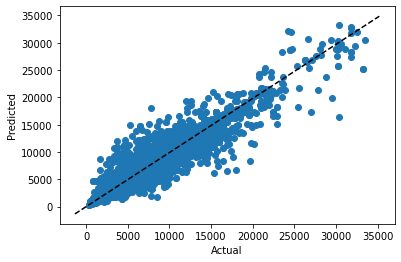

array([ 2603.11588834,  1736.36356376,   800.96061177, ...,
       10924.36507937,  3031.14805411,  2887.11062507])

In [381]:
bagging = BaggingRegressor(base_estimator=DecisionTreeRegressor(),n_estimators = 50)
display_model("Bagging",bagging)

====== Test Score ======
Rsquare: 0.917784
mae: 482.547927
rmse: 1082.822564
====== Test Prediction vs Actual ======


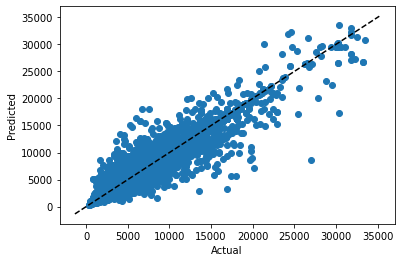

array([ 2640.        ,  1770.        ,   820.        , ...,
       11735.57463998,  3100.        ,  3336.        ])

In [382]:
knn = KNeighborsRegressor(weights='distance', metric='euclidean',n_neighbors = 5)
display_model("KNN",knn)

On obtient ainsi un tableau pour comparer les performances des différents algorithmes. On voit que Bagging, Random Forest et KNN donnent des résultats assez satisfaisants avec une erreur moyenne d'environ 5€.

In [383]:
t  = PrettyTable(["Model","MAE","RMSE","R_square"])
for i in range(len(regressor)):
  t.add_row([regressor[i],round(mae_list[i],2),round(rmse_list[i],2),round(rsquare_list[i],4)])
print(t)

+--------------------------+---------+---------+----------+
|          Model           |   MAE   |   RMSE  | R_square |
+--------------------------+---------+---------+----------+
|   Regression Lineaire    | 1204.55 |  2062.4 |  0.7017  |
| Decision tree regressor  |  468.03 | 1080.55 |  0.9181  |
| Random Forest Regression |  470.65 |  995.15 |  0.9306  |
|         Bagging          |  470.87 |  991.22 |  0.9311  |
|           KNN            |  482.55 | 1082.82 |  0.9178  |
+--------------------------+---------+---------+----------+


Voilà, pour moi, je vous remercie d'avoir pris le temps de lire jusqu'ici. J'ai hâte d'avoir votre feedback et les pistes d'amélioration.